In [19]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dropout

import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv("/content/diabetes.csv")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [21]:
x = df.drop(columns = ["Outcome"],axis =1 )
y = df["Outcome"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                 y,
                                                 train_size = 0.8,
                                                 random_state = 42)

In [23]:
# scaling

scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)

x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

In [24]:
x_train_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095
...,...,...,...,...,...,...,...,...
609,0.379793,0.566871,-0.292759,0.946800,0.504235,-0.437451,-0.172824,-0.600933
610,-0.828460,-0.776503,2.842797,-1.322774,-0.701206,-1.239073,-0.778934,-0.513932
611,1.890109,-0.620297,0.896590,1.076490,-0.701206,1.760544,1.981245,0.443084
612,-1.130523,0.629354,-3.752683,-1.322774,-0.701206,1.346804,-0.784877,-0.339929


In [25]:
## creating the ANN architecthure

model = tf.keras.Sequential(name = "Main_container")

model.add(tf.keras.layers.Input(shape = [8],name = "Input_layer"))

model.add(tf.keras.layers.Dense(units = 20,activation = "relu",kernel_initializer = "he_normal",name = "hidden_layer_1"))

model.add(tf.keras.layers.Dense(units = 18,activation = "relu",kernel_initializer = "he_normal",name = "hidden_layer_2"))

model.add(tf.keras.layers.Dense(units = 10,activation = "relu",kernel_initializer = "he_normal",name = "hidden_layer_3"))

model.add(tf.keras.layers.Dense(units = 5,activation = "relu",kernel_initializer = "he_normal",name = "hidden_layer_4"))

model.add(tf.keras.layers.Dense(units = 1,activation = "sigmoid",name = "Output_layer"))

In [26]:
model.summary()

Model: "Main_container"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 20)                180       
                                                                 
 hidden_layer_2 (Dense)      (None, 18)                378       
                                                                 
 hidden_layer_3 (Dense)      (None, 10)                190       
                                                                 
 hidden_layer_4 (Dense)      (None, 5)                 55        
                                                                 
 Output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 809 (3.16 KB)
Trainable params: 809 (3.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model.layers[2].get_weights()

[array([[-0.22466293,  0.14259176,  0.01118511, -0.35440898,  0.3541712 ,
         -0.08729811, -0.73449033, -0.1010977 , -0.25038984, -0.6591493 ],
        [ 0.1665343 ,  0.03310531,  0.14392152, -0.08013362, -0.05935854,
         -0.08855663, -0.81884897,  0.6101933 ,  0.26146257,  0.29946944],
        [-1.0551311 , -1.0038414 , -0.07180086, -0.9600069 , -0.6323527 ,
         -0.73701036, -0.59001166,  0.9044314 ,  0.8080147 , -0.2653028 ],
        [ 0.16744503,  0.7095505 , -0.71971834,  0.649766  ,  0.05693093,
          0.19702636,  0.2231028 ,  0.37268993, -0.561363  , -0.64323115],
        [ 0.25674117, -0.31668487, -0.18788809,  0.1092055 ,  0.24628823,
          0.28294435, -0.0788204 ,  0.09278896, -0.47311184, -1.1676878 ],
        [ 0.25542378,  0.30144584, -0.26494032, -0.05736917,  0.11253623,
         -1.2364676 , -0.30648482, -0.18106781,  0.9041361 , -0.04432075],
        [ 0.3083031 ,  0.14507546,  0.10049454, -0.08569483, -0.16249174,
          0.00597605,  0.7052967

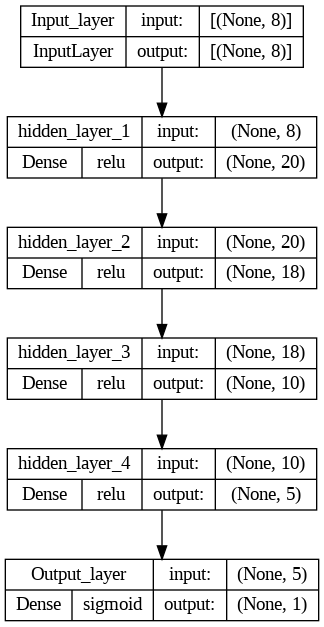

In [28]:
plot_model(
    model,
    show_shapes = True,
    show_layer_names = True,
    show_layer_activations = True
)

In [38]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history = model.fit(
                    x_train_scaled,
                    y_train,
                    verbose = True,
                    batch_size = 4,
                    validation_split = 0.2,
                    epochs = 50,
                    workers = 10,
                    use_multiprocessing = True

)

Epoch 1/50
123/123 [==============================] - 2s 5ms/step - loss: 0.1609 - accuracy: 0.9552 - val_loss: 0.8494 - val_accuracy: 0.7073
Epoch 2/50
123/123 [==============================] - 0s 3ms/step - loss: 0.1601 - accuracy: 0.9532 - val_loss: 0.8576 - val_accuracy: 0.6992
Epoch 3/50
123/123 [==============================] - 0s 4ms/step - loss: 0.1636 - accuracy: 0.9491 - val_loss: 0.8160 - val_accuracy: 0.6911
Epoch 4/50
123/123 [==============================] - 0s 3ms/step - loss: 0.1513 - accuracy: 0.9552 - val_loss: 0.8625 - val_accuracy: 0.7073
Epoch 5/50
123/123 [==============================] - 0s 3ms/step - loss: 0.1502 - accuracy: 0.9511 - val_loss: 0.8571 - val_accuracy: 0.7154
Epoch 6/50
123/123 [==============================] - 0s 3ms/step - loss: 0.1450 - accuracy: 0.9613 - val_loss: 0.9333 - val_accuracy: 0.7154
Epoch 7/50
123/123 [==============================] - 0s 3ms/step - loss: 0.1461 - accuracy: 0.9572 - val_loss: 0.9158 - val_accuracy: 0.6992
Epoch 

In [33]:
def plotting(history,keyword):

  plt.plot(history.history[keyword])
  plt.plot(history.history["val_"+keyword])

  plt.title("Model "+ keyword)
  plt.ylabel(keyword)
  plt.xlabel("epochs")

  plt.legend(["training data ","validataion data "])

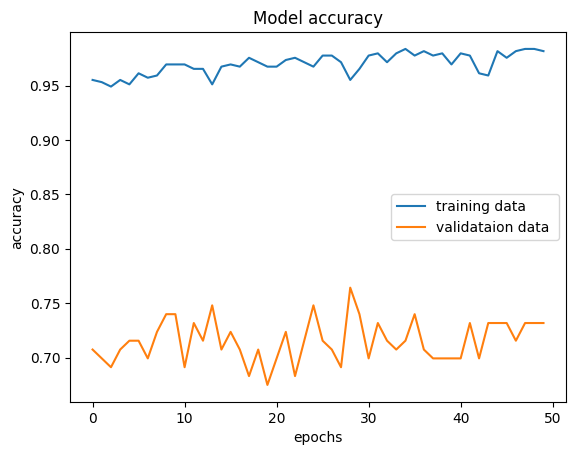

In [39]:
plotting(history,"accuracy")

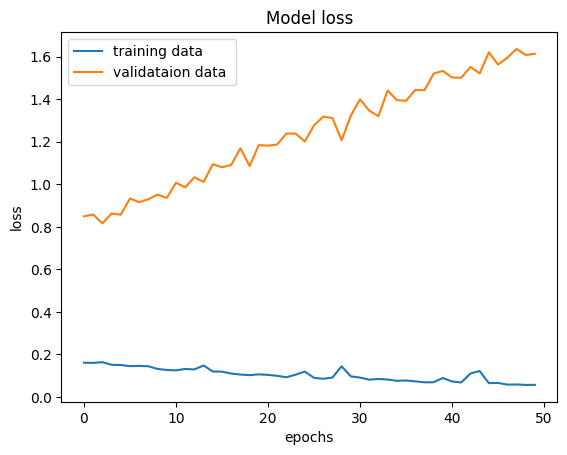

In [40]:
plotting(history,"loss")

##Dropout

In [42]:
## creating the ANN architecthure

model_1 = tf.keras.Sequential(name = "Main_container")

model_1.add(tf.keras.layers.Input(shape = [8],name = "Input_layer"))

model_1.add(tf.keras.layers.Dense(units = 20,activation = "relu",kernel_initializer = "he_normal",name = "hidden_layer_1"))

model_1.add(tf.keras.layers.Dense(units = 18,activation = "relu",kernel_initializer = "he_normal",name = "hidden_layer_2"))
model_1.add(Dropout(0.3))

model_1.add(tf.keras.layers.Dense(units = 10,activation = "relu",kernel_initializer = "he_normal",name = "hidden_layer_3"))
model_1.add(Dropout(0.3))

model_1.add(tf.keras.layers.Dense(units = 5,activation = "relu",kernel_initializer = "he_normal",name = "hidden_layer_4"))
model_1.add(Dropout(0.3))

model_1.add(tf.keras.layers.Dense(units = 1,activation = "sigmoid",name = "Output_layer"))

In [43]:
model_1.compile(
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history_1 = model_1.fit(
                    x_train_scaled,
                    y_train,
                    verbose = True,
                    batch_size = 32,
                    validation_split = 0.2,
                    epochs = 150,
                    workers = 10,
                    use_multiprocessing = True

)

Epoch 1/150
16/16 [==============================] - 2s 18ms/step - loss: 0.7215 - accuracy: 0.5560 - val_loss: 0.6801 - val_accuracy: 0.5691
Epoch 2/150
16/16 [==============================] - 0s 6ms/step - loss: 0.7223 - accuracy: 0.5682 - val_loss: 0.6766 - val_accuracy: 0.6260
Epoch 3/150
16/16 [==============================] - 0s 5ms/step - loss: 0.7217 - accuracy: 0.6029 - val_loss: 0.6729 - val_accuracy: 0.6504
Epoch 4/150
16/16 [==============================] - 0s 5ms/step - loss: 0.7017 - accuracy: 0.5804 - val_loss: 0.6714 - val_accuracy: 0.7236
Epoch 5/150
16/16 [==============================] - 0s 5ms/step - loss: 0.6795 - accuracy: 0.6212 - val_loss: 0.6682 - val_accuracy: 0.6992
Epoch 6/150
16/16 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.6008 - val_loss: 0.6669 - val_accuracy: 0.6748
Epoch 7/150
16/16 [==============================] - 0s 6ms/step - loss: 0.6952 - accuracy: 0.6212 - val_loss: 0.6650 - val_accuracy: 0.6748
Epoch 8/150


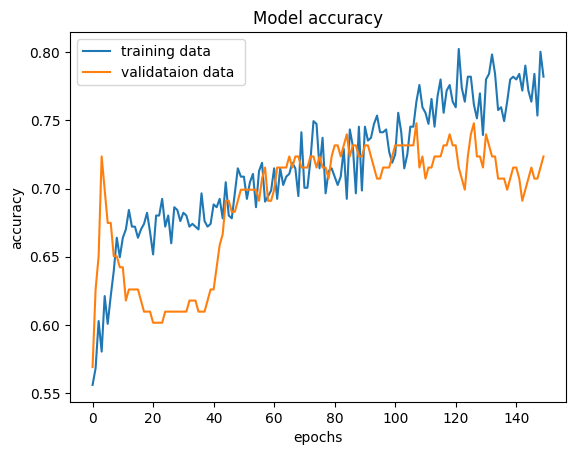

In [45]:
plotting(history_1,"accuracy")

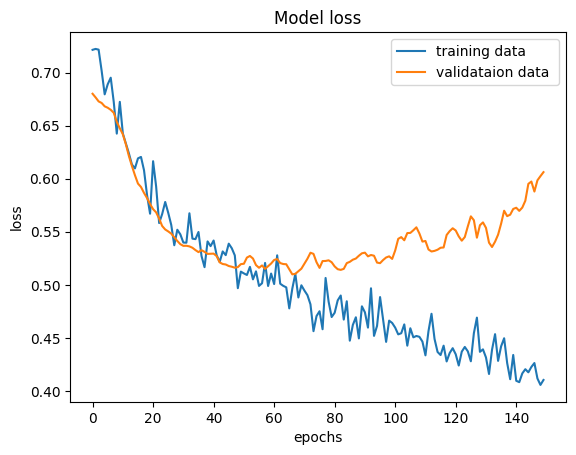

In [44]:
plotting(history_1,"loss")

In [47]:
"""

callbacks

Early stopping


overfitting is the nightmare in machine learning
one way to avoid is to termminate process early
"""


'\n\ncallbacks \n\nEarly stopping\n\n'

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
class Conditionalcallback(tf.keras.callbacks.Callback):

  def end_epoch(self,epoch,logs = {}):
    if (logs.get("accuracy")>=0.80 and logs.get("val_accuracy")>=0.80):
      self.model.stop_training = True

In [50]:
conditional_callback = Conditionalcallback()

In [51]:
early_stopper = EarlyStopping(
                        monitor = "val_accuracy",
                        min_delta = 0.02,
                        patience = 50,
                        mode = "max",
                        restore_best_weights = True

)

In [60]:
## creating the ANN architecthure

model_2 = tf.keras.Sequential(name = "Main_container")

model_2.add(tf.keras.layers.Input(shape = [8],name = "Input_layer"))

model_2.add(tf.keras.layers.Dense(units = 20,activation = "relu",kernel_initializer = "he_normal",name = "hidden_layer_1"))

model_2.add(tf.keras.layers.Dense(units = 18,activation = "relu",kernel_initializer = "he_uniform",name = "hidden_layer_2"))
model_2.add(Dropout(0.3))

model_2.add(tf.keras.layers.Dense(units = 10,activation = "relu",kernel_initializer = "he_uniform",name = "hidden_layer_3"))
model_2.add(Dropout(0.3))


model_2.add(tf.keras.layers.Dense(units = 1,activation = "sigmoid",name = "Output_layer"))

In [61]:
model_2.compile(
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

history_2 = model_2.fit(
                    x_train_scaled,
                    y_train,
                    verbose = True,
                    batch_size = 32,
                    validation_data = [x_test_scaled , y_test],
                    callbacks = [conditional_callback,early_stopper],
                    epochs = 150,
                    workers = 10,
                    use_multiprocessing = True

)

Epoch 1/150
154/154 [==============================] - 2s 4ms/step - loss: 0.6780 - accuracy: 0.6401 - val_loss: 0.5638 - val_accuracy: 0.6688
Epoch 2/150
154/154 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.6792 - val_loss: 0.5529 - val_accuracy: 0.6623
Epoch 3/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.6987 - val_loss: 0.5342 - val_accuracy: 0.6818
Epoch 4/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5371 - accuracy: 0.7264 - val_loss: 0.5302 - val_accuracy: 0.7078
Epoch 5/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7036 - val_loss: 0.5309 - val_accuracy: 0.7208
Epoch 6/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.7182 - val_loss: 0.5303 - val_accuracy: 0.7143
Epoch 7/150
154/154 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7378 - val_loss: 0.5315 - val_accuracy: 0.7273

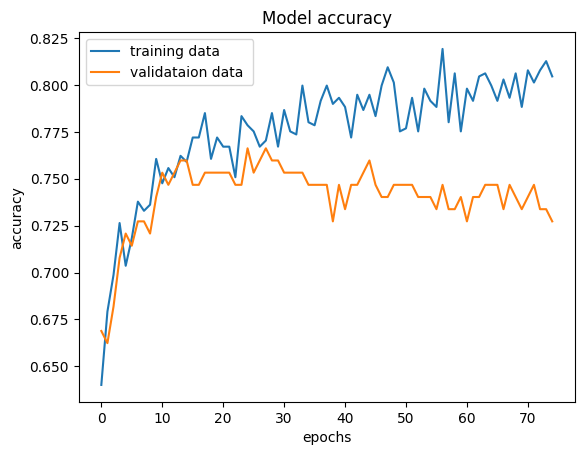

In [62]:
plotting(history_2,"accuracy")

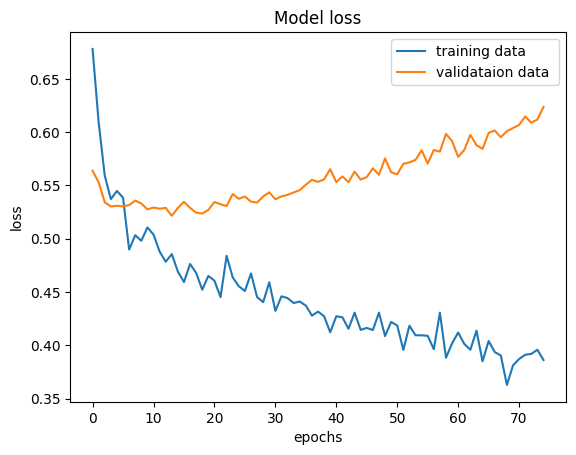

In [63]:
plotting(history_2,"loss")